In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
df = pd.read_csv('../input/kc-house-data/kc_house_data.csv')
df = df[['id', 'price', 'sqft_living', 'waterfront', 'zipcode', 'long', 'lat']]
df.head()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,id,price,sqft_living,waterfront,zipcode,long,lat
0,7129300520,221900.0,1180,0,98178,-122.257,47.5112
1,6414100192,538000.0,2570,0,98125,-122.319,47.7210
2,5631500400,180000.0,770,0,98028,-122.233,47.7379
3,2487200875,604000.0,1960,0,98136,-122.393,47.5208
4,1954400510,510000.0,1680,0,98074,-122.045,47.6168


In [2]:
# kings_county_map = gpd.read_file('kc_tract_10.shp')
# kings_county_map.plot()

In [3]:
# kings_county_map.to_crs(epsg=4326).plot()

In [4]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
geo_df.head()

,id,price,sqft_living,waterfront,zipcode,long,lat,geometry
0,7129300520,221900.0,1180,0,98178,-122.257,47.5112,POINT (-122.25700 47.51120)
1,6414100192,538000.0,2570,0,98125,-122.319,47.7210,POINT (-122.31900 47.72100)
2,5631500400,180000.0,770,0,98028,-122.233,47.7379,POINT (-122.23300 47.73790)
3,2487200875,604000.0,1960,0,98136,-122.393,47.5208,POINT (-122.39300 47.52080)
4,1954400510,510000.0,1680,0,98074,-122.045,47.6168,POINT (-122.04500 47.61680)


Text(0.5, 1.0, 'Kings County Real Estate')

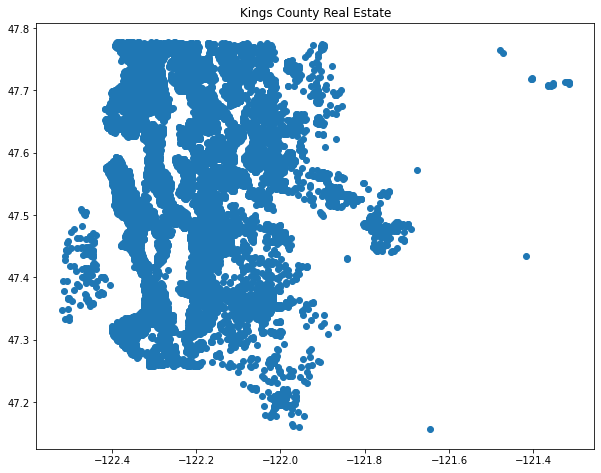

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
#kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('Kings County Real Estate')

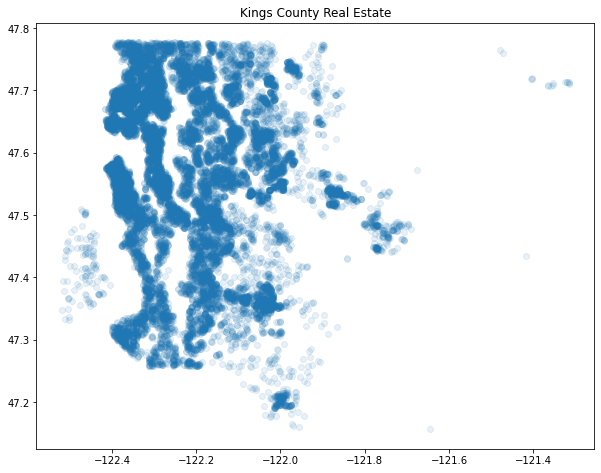

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
#kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, alpha = .1 )
ax.set_title('Kings County Real Estate')
plt.savefig('Property Map')

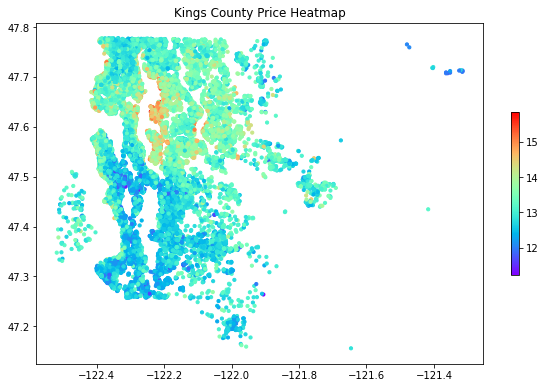

In [8]:
geo_df['price_log'] = np.log(geo_df['price'])
fig, ax = plt.subplots(figsize = (10,10))
#kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'price_log', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Kings County Price Heatmap')
plt.savefig('Heat Map')

Text(0.5, 1.0, 'Sqft Heatmap')

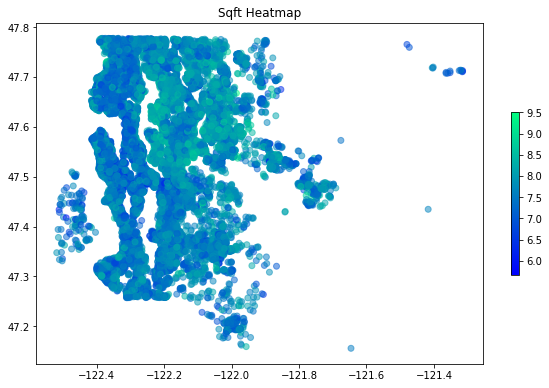

In [9]:
geo_df['sqft_log'] = np.log(geo_df['sqft_living'])
fig, ax = plt.subplots(figsize = (10,10))
#kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'sqft_log', ax=ax, cmap = 'winter',
            legend = True, legend_kwds={'shrink': 0.3},
            alpha = .5)
ax.set_title('Sqft Heatmap')


In [10]:
df_fiji = pd.read_csv('../input/sownalfiji/53YearsTemp.csv')

In [11]:
df_fiji

,Station,Region,lat,long,Year,Year.1,Year.2,Year.3,Year.4,Year.5,...,Year.44,Year.45,Year.46,Year.47,Year.48,Year.49,Year.50,Year.51,Year.52,Year.53
0,NaN,NaN,NaN,NaN,1965.00,1966.00,1967.00,1968.00,1969.00,1970.00,...,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018.00
1,Koronivia,Central,-18.0500,178.5333,23.77,23.95,24.68,19.23,23.78,24.62,...,24.93,25.49,25.57,23.61,24.96,20.91,24.60,20.99,24.32,22.84
2,Labasa,Northern,-16.4311,179.3702,24.77,24.88,25.28,25.21,25.08,25.65,...,25.95,26.69,26.64,26.24,26.79,26.10,25.68,26.44,25.90,25.73
3,Laucala,Central,-18.1405,178.4233,24.77,24.88,25.28,25.21,25.08,25.65,...,25.95,26.69,26.64,26.24,26.79,26.10,25.68,26.44,25.90,25.73
4,Lautoka,Western,-17.6177,177.4505,25.00,25.47,25.47,25.60,25.72,25.81,...,25.67,26.74,26.42,23.61,25.62,26.07,25.70,25.89,24.34,25.14
5,Levuka,Eastern,-17.6817,178.8323,24.77,24.51,25.69,25.87,25.81,26.05,...,25.67,26.74,26.42,23.61,25.62,26.07,25.70,25.89,24.34,25.14
6,Matei,Northern,-16.8414,179.9813,24.93,25.33,25.34,25.87,25.51,25.43,...,26.30,26.97,19.42,25.82,26.39,26.42,25.00,25.89,24.34,25.14
7,Matuku,Eastern,-17.6817,178.8323,24.73,24.80,25.48,24.80,25.25,25.27,...,25.65,24.83,25.45,25.64,25.46,26.42,25.00,25.89,24.34,25.14
8,Nabouwalu,Northern,-16.9846,178.6867,25.02,25.02,25.35,25.61,25.46,25.88,...,25.64,26.34,26.20,26.13,26.83,25.79,23.19,24.49,25.83,25.01
9,Nacocolevu,Western,-18.1013,177.5363,25.02,25.02,25.35,25.61,25.46,25.88,...,19.48,22.51,22.72,21.13,18.95,24.42,24.03,24.00,22.96,25.01


In [11]:
# fiji_county_map = gpd.read_file('../input/fjishape2/FJI_adm2.shp')
# fiji_county_map.plot()

In [12]:
# fiji_county_map.to_crs(epsg=3460).to_crs(epsg=4326).plot()

In [13]:
#crs = {'init':'EPSG:3460'}
geometry = [Point(xy) for xy in zip(df_fiji.iloc[1:-1,:]['long'], df_fiji.iloc[1:-1,:]['lat'])]
geo_df = gpd.GeoDataFrame(df_fiji.iloc[1:-1,:], 
                          #crs = crs, 
                          geometry = geometry)

In [14]:
geo_df

,Station,Region,lat,long,Year,Year.1,Year.2,Year.3,Year.4,Year.5,...,Year.45,Year.46,Year.47,Year.48,Year.49,Year.50,Year.51,Year.52,Year.53,geometry
1,Koronivia,Central,-18.0500,178.5333,23.77,23.95,24.68,19.23,23.78,24.62,...,25.49,25.57,23.61,24.96,20.91,24.60,20.99,24.32,22.84,POINT (178.53330 -18.05000)
2,Labasa,Northern,-16.4311,179.3702,24.77,24.88,25.28,25.21,25.08,25.65,...,26.69,26.64,26.24,26.79,26.10,25.68,26.44,25.90,25.73,POINT (179.37020 -16.43110)
3,Laucala,Central,-18.1405,178.4233,24.77,24.88,25.28,25.21,25.08,25.65,...,26.69,26.64,26.24,26.79,26.10,25.68,26.44,25.90,25.73,POINT (178.42330 -18.14050)
4,Lautoka,Western,-17.6177,177.4505,25.00,25.47,25.47,25.60,25.72,25.81,...,26.74,26.42,23.61,25.62,26.07,25.70,25.89,24.34,25.14,POINT (177.45050 -17.61770)
5,Levuka,Eastern,-17.6817,178.8323,24.77,24.51,25.69,25.87,25.81,26.05,...,26.74,26.42,23.61,25.62,26.07,25.70,25.89,24.34,25.14,POINT (178.83230 -17.68170)
6,Matei,Northern,-16.8414,179.9813,24.93,25.33,25.34,25.87,25.51,25.43,...,26.97,19.42,25.82,26.39,26.42,25.00,25.89,24.34,25.14,POINT (179.98130 -16.84140)
7,Matuku,Eastern,-17.6817,178.8323,24.73,24.80,25.48,24.80,25.25,25.27,...,24.83,25.45,25.64,25.46,26.42,25.00,25.89,24.34,25.14,POINT (178.83230 -17.68170)
8,Nabouwalu,Northern,-16.9846,178.6867,25.02,25.02,25.35,25.61,25.46,25.88,...,26.34,26.20,26.13,26.83,25.79,23.19,24.49,25.83,25.01,POINT (178.68670 -16.98460)
9,Nacocolevu,Western,-18.1013,177.5363,25.02,25.02,25.35,25.61,25.46,25.88,...,22.51,22.72,21.13,18.95,24.42,24.03,24.00,22.96,25.01,POINT (177.53630 -18.10130)
10,Nadi,Western,-17.7765,177.4356,24.96,25.11,25.21,25.11,25.53,25.56,...,26.30,25.87,25.76,25.97,25.87,25.64,25.81,26.34,26.07,POINT (177.43560 -17.77650)


In [25]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.path as mpath

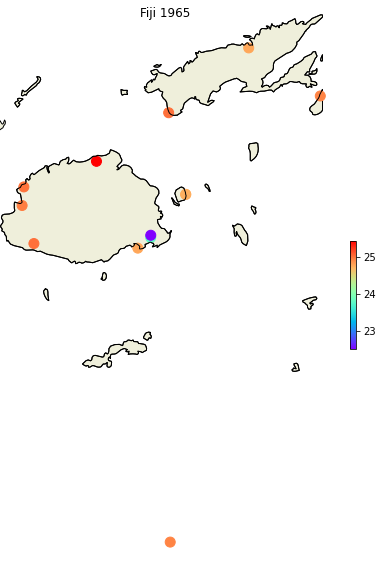

In [43]:
geo_df['Year'] = geo_df['Year']
fig, ax = plt.subplots(figsize = (10,10), subplot_kw={'projection': ccrs.PlateCarree()})
#fiji_county_map.to_crs(epsg=3460).plot(ax=ax, color='lightgrey')

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
geo_df.plot(column = 'Year', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.2}, 
            markersize = 100)
ax.set_title('Fiji 1965')
ax.coastlines(resolution='10m',  alpha=1)

xlim = [-20, -16]
ylim = [176.0, 210]
lower_space = 10 # this needs to be manually increased if the lower arched is cut off by changing lon and lat lims

rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ]).interpolated(20)

proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)

ax.set_boundary(rect_in_target)

# resol = '50m'  # use data at this scale
# land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
#     scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
# ax.add_feature(land, facecolor='beige')
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')



plt.savefig('Heat Map')